In [1]:
import warnings
warnings.filterwarnings('ignore')
import pandas as pd
import numpy as np

In [2]:
from sklearn.pipeline import Pipeline,FeatureUnion
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from mypipes import *
from sklearn.model_selection import cross_val_score
import matplotlib.pylab as plt 

In [3]:
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_squared_error

from sklearn.linear_model import Ridge,Lasso
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import classification_report

from ModelNumerical import *

In [4]:
filepath="G:\Python_new\Project3\counterfeit_train.csv"

In [5]:
counterfiet=pd.read_csv(filepath)

array([[<Axes: title={'center': 'Counterfeit_Weight'}>,
        <Axes: title={'center': 'Active_Since'}>],
       [<Axes: title={'center': 'Medicine_MRP'}>,
        <Axes: title={'center': 'Availability_rating'}>],
       [<Axes: title={'center': 'Counterfeit_Sales'}>, <Axes: >]],
      dtype=object)

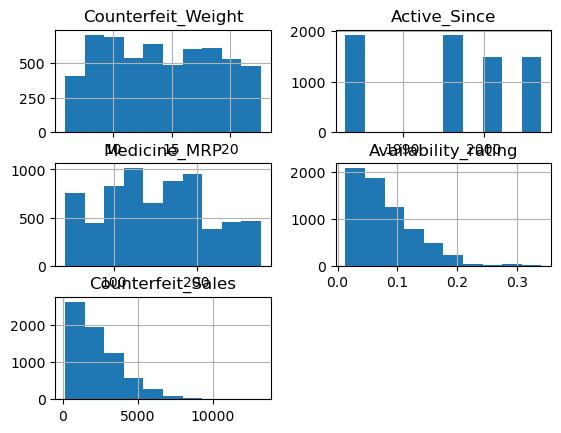

In [6]:
counterfiet.hist()

In [7]:
train_data,test_data=train_test_split(counterfiet,test_size=0.2,random_state=42)

In [8]:
train_data.to_csv(r"G:\Python_new\Project3\bd_train.csv",index=False)
test_data.to_csv(r"G:\Python_new\Project3\bd_test.csv",index=False)

In [9]:
bd_train=pd.read_csv(r"G:\Python_new\Project3\bd_train.csv")
bd_test=pd.read_csv(r"G:\Python_new\Project3\bd_test.csv")
counter_test=pd.read_csv("G:\Python_new\Project3\counterfeit_test.csv")

In [10]:
bd_train

,Medicine_ID,Counterfeit_Weight,DistArea_ID,Active_Since,Medicine_MRP,Medicine_Type,SidEffect_Level,Availability_rating,Area_Type,Area_City_Type,Area_dist_level,Counterfeit_Sales
0,OVZ29,15.1,Area018,2007,242.9984,Hreplacements,critical,0.070104,Industrial,Tier 3,Medium,1503.1904
1,GMV25,12.4,Area049,1997,199.5846,Antibiotics,mild,0.123844,DownTown,Tier 1,Medium,5272.2842
2,TIQ73,NaN,Area027,1983,178.5474,Antibiotics,mild,0.038612,CityLimits,Tier 3,Medium,3313.5006
3,BSV80,12.3,Area045,2000,134.7046,Antacids,mild,0.119051,DownTown,Tier 2,Unknown,2354.0828
4,TTV84,17.4,Area018,2007,137.3362,OralContraceptives,critical,0.060997,Industrial,Tier 3,Medium,1497.1982
...,...,...,...,...,...,...,...,...,...,...,...,...
5449,TBP63,NaN,Area019,1983,113.2332,Antacids,mild,0.055942,MidTownResidential,Tier 1,Small,215.5332
5450,UJD45,NaN,Area027,1983,63.5614,OralContraceptives,mild,0.039409,CityLimits,Tier 3,Medium,720.8754
5451,AJO33,17.8,Area013,1985,191.2318,Antiseptics,mild,0.049611,DownTown,Tier 3,High,3360.7724
5452,CYP90,22.0,Area049,1997,166.9288,Mstablizers,mild,0.034464,DownTown,Tier 1,Medium,4041.2200


In [11]:
bd_test

,Medicine_ID,Counterfeit_Weight,DistArea_ID,Active_Since,Medicine_MRP,Medicine_Type,SidEffect_Level,Availability_rating,Area_Type,Area_City_Type,Area_dist_level,Counterfeit_Sales
0,CKE54,21.300,Area010,1996,56.7744,Antibiotics,critical,0.013000,MidTownResidential,Tier 3,Unknown,158.2744
1,JTJ10,17.150,Area035,2002,63.6956,Hreplacements,mild,0.070303,DownTown,Tier 2,Small,713.5516
2,GZY85,9.535,Area017,2005,194.7950,Tranquilizers,mild,0.027541,DownTown,Tier 2,Unknown,3957.9950
3,RCK21,17.150,Area046,1995,54.3112,Antiseptics,mild,0.033488,DownTown,Tier 1,Small,581.7232
4,GWI12,10.010,Area010,1996,196.8924,Cardiac,critical,0.133773,MidTownResidential,Tier 3,Unknown,668.2772
...,...,...,...,...,...,...,...,...,...,...,...,...
1359,MOL44,10.195,Area045,2000,123.0544,Antiseptics,mild,0.137968,DownTown,Tier 2,Unknown,3580.4864
1360,DDB57,15.600,Area010,1996,220.4586,Antimalarial,critical,0.096148,MidTownResidential,Tier 3,Unknown,535.1172
1361,HTY10,7.660,Area017,2005,56.2060,Antibiotics,mild,0.134225,DownTown,Tier 2,Unknown,1231.5440
1362,DGX15,10.900,Area045,2000,268.7620,Hreplacements,mild,0.064572,DownTown,Tier 2,Unknown,4786.9160


In [12]:
5454+1364

6818

In [13]:
bd_train.isnull().sum()

Medicine_ID              0
Counterfeit_Weight     920
DistArea_ID              0
Active_Since             0
Medicine_MRP             0
Medicine_Type            0
SidEffect_Level          0
Availability_rating      0
Area_Type                0
Area_City_Type           0
Area_dist_level          0
Counterfeit_Sales        0
dtype: int64

In [14]:
counterfiet.isnull().sum()

Medicine_ID               0
Counterfeit_Weight     1166
DistArea_ID               0
Active_Since              0
Medicine_MRP              0
Medicine_Type             0
SidEffect_Level           0
Availability_rating       0
Area_Type                 0
Area_City_Type            0
Area_dist_level           0
Counterfeit_Sales         0
dtype: int64

In [15]:
bd_train['Medicine_ID'].nunique()

1538

In [16]:
(bd_train['Medicine_ID']=='RRA15').sum()

2

In [17]:
from mypipes import *

In [18]:
bd_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5454 entries, 0 to 5453
Data columns (total 12 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Medicine_ID          5454 non-null   object 
 1   Counterfeit_Weight   4534 non-null   float64
 2   DistArea_ID          5454 non-null   object 
 3   Active_Since         5454 non-null   int64  
 4   Medicine_MRP         5454 non-null   float64
 5   Medicine_Type        5454 non-null   object 
 6   SidEffect_Level      5454 non-null   object 
 7   Availability_rating  5454 non-null   float64
 8   Area_Type            5454 non-null   object 
 9   Area_City_Type       5454 non-null   object 
 10  Area_dist_level      5454 non-null   object 
 11  Counterfeit_Sales    5454 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 511.4+ KB


array([[<Axes: title={'center': 'Counterfeit_Weight'}>,
        <Axes: title={'center': 'Active_Since'}>],
       [<Axes: title={'center': 'Medicine_MRP'}>,
        <Axes: title={'center': 'Availability_rating'}>],
       [<Axes: title={'center': 'Counterfeit_Sales'}>, <Axes: >]],
      dtype=object)

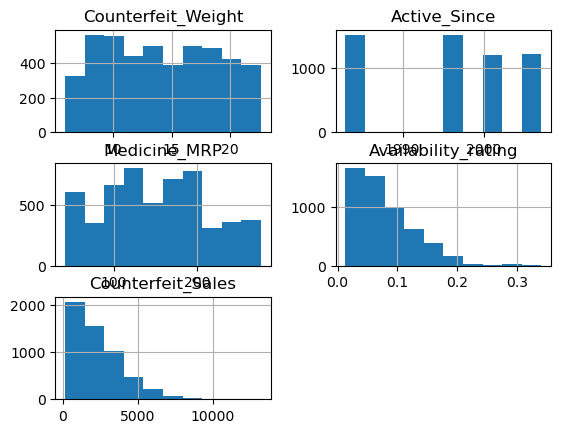

In [19]:
bd_train.hist()

In [20]:
bd_train

,Medicine_ID,Counterfeit_Weight,DistArea_ID,Active_Since,Medicine_MRP,Medicine_Type,SidEffect_Level,Availability_rating,Area_Type,Area_City_Type,Area_dist_level,Counterfeit_Sales
0,OVZ29,15.1,Area018,2007,242.9984,Hreplacements,critical,0.070104,Industrial,Tier 3,Medium,1503.1904
1,GMV25,12.4,Area049,1997,199.5846,Antibiotics,mild,0.123844,DownTown,Tier 1,Medium,5272.2842
2,TIQ73,NaN,Area027,1983,178.5474,Antibiotics,mild,0.038612,CityLimits,Tier 3,Medium,3313.5006
3,BSV80,12.3,Area045,2000,134.7046,Antacids,mild,0.119051,DownTown,Tier 2,Unknown,2354.0828
4,TTV84,17.4,Area018,2007,137.3362,OralContraceptives,critical,0.060997,Industrial,Tier 3,Medium,1497.1982
...,...,...,...,...,...,...,...,...,...,...,...,...
5449,TBP63,NaN,Area019,1983,113.2332,Antacids,mild,0.055942,MidTownResidential,Tier 1,Small,215.5332
5450,UJD45,NaN,Area027,1983,63.5614,OralContraceptives,mild,0.039409,CityLimits,Tier 3,Medium,720.8754
5451,AJO33,17.8,Area013,1985,191.2318,Antiseptics,mild,0.049611,DownTown,Tier 3,High,3360.7724
5452,CYP90,22.0,Area049,1997,166.9288,Mstablizers,mild,0.034464,DownTown,Tier 1,Medium,4041.2200


In [21]:
dataframe = ['Medicine_ID','Counterfeit_Weight','Medicine_Type']

# Create the new DataFrame with only the selected columns
df = bd_train[dataframe]
df
df_test=bd_test[dataframe]
Df_test=counter_test[dataframe]

In [22]:
df['Medicine_ID'].nunique()

1538

In [23]:
df['Counterfeit_Weight'].nunique()

409

In [24]:
df['Medicine_Type'].nunique()

16

In [25]:
df.head()

,Medicine_ID,Counterfeit_Weight,Medicine_Type
0,OVZ29,15.1,Hreplacements
1,GMV25,12.4,Antibiotics
2,TIQ73,NaN,Antibiotics
3,BSV80,12.3,Antacids
4,TTV84,17.4,OralContraceptives


In [26]:
def impute_weight(row, df):
    if pd.isna(row['Counterfeit_Weight']):
        similar_rows = df[(df['Medicine_ID'] == row['Medicine_ID']) & 
                          (df['Medicine_Type'] == row['Medicine_Type']) & 
                          df['Counterfeit_Weight'].notna()]
        if not similar_rows.empty:
            return similar_rows['Counterfeit_Weight'].mean()
    return row['Counterfeit_Weight']

# Apply the imputation function
df['Counterfeit_Weight'] = df.apply(impute_weight, axis=1, args=(df,))

# Display the DataFrame after imputation
print("DataFrame after imputation:")
print(df)

df_test['Counterfeit_Weight'] = df_test.apply(impute_weight, axis=1, args=(df_test,))
print("DataFrame after imputation:")
print(df_test)

Df_test['Counterfeit_Weight'] = Df_test.apply(impute_weight, axis=1, args=(Df_test,))
print("DataFrame after imputation:")
print(Df_test)

DataFrame after imputation:
     Medicine_ID  Counterfeit_Weight       Medicine_Type
0          OVZ29              15.100       Hreplacements
1          GMV25              12.400         Antibiotics
2          TIQ73              17.550         Antibiotics
3          BSV80              12.300            Antacids
4          TTV84              17.400  OralContraceptives
...          ...                 ...                 ...
5449       TBP63               7.850            Antacids
5450       UJD45              17.900  OralContraceptives
5451       AJO33              17.800         Antiseptics
5452       CYP90              22.000         Mstablizers
5453       PMC25               9.085         Antibiotics

[5454 rows x 3 columns]
DataFrame after imputation:
     Medicine_ID  Counterfeit_Weight  Medicine_Type
0          CKE54              21.300    Antibiotics
1          JTJ10              17.150  Hreplacements
2          GZY85               9.535  Tranquilizers
3          RCK21           

In [27]:
bd_train[['Medicine_ID','Counterfeit_Weight','Medicine_Type']]=df[['Medicine_ID','Counterfeit_Weight','Medicine_Type']]
bd_test[['Medicine_ID','Counterfeit_Weight','Medicine_Type']]=df_test[['Medicine_ID','Counterfeit_Weight','Medicine_Type']]
counter_test[['Medicine_ID','Counterfeit_Weight','Medicine_Type']]=Df_test[['Medicine_ID','Counterfeit_Weight','Medicine_Type']]       

In [28]:
bd_train

,Medicine_ID,Counterfeit_Weight,DistArea_ID,Active_Since,Medicine_MRP,Medicine_Type,SidEffect_Level,Availability_rating,Area_Type,Area_City_Type,Area_dist_level,Counterfeit_Sales
0,OVZ29,15.100,Area018,2007,242.9984,Hreplacements,critical,0.070104,Industrial,Tier 3,Medium,1503.1904
1,GMV25,12.400,Area049,1997,199.5846,Antibiotics,mild,0.123844,DownTown,Tier 1,Medium,5272.2842
2,TIQ73,17.550,Area027,1983,178.5474,Antibiotics,mild,0.038612,CityLimits,Tier 3,Medium,3313.5006
3,BSV80,12.300,Area045,2000,134.7046,Antacids,mild,0.119051,DownTown,Tier 2,Unknown,2354.0828
4,TTV84,17.400,Area018,2007,137.3362,OralContraceptives,critical,0.060997,Industrial,Tier 3,Medium,1497.1982
...,...,...,...,...,...,...,...,...,...,...,...,...
5449,TBP63,7.850,Area019,1983,113.2332,Antacids,mild,0.055942,MidTownResidential,Tier 1,Small,215.5332
5450,UJD45,17.900,Area027,1983,63.5614,OralContraceptives,mild,0.039409,CityLimits,Tier 3,Medium,720.8754
5451,AJO33,17.800,Area013,1985,191.2318,Antiseptics,mild,0.049611,DownTown,Tier 3,High,3360.7724
5452,CYP90,22.000,Area049,1997,166.9288,Mstablizers,mild,0.034464,DownTown,Tier 1,Medium,4041.2200


In [29]:
bd_test

,Medicine_ID,Counterfeit_Weight,DistArea_ID,Active_Since,Medicine_MRP,Medicine_Type,SidEffect_Level,Availability_rating,Area_Type,Area_City_Type,Area_dist_level,Counterfeit_Sales
0,CKE54,21.300,Area010,1996,56.7744,Antibiotics,critical,0.013000,MidTownResidential,Tier 3,Unknown,158.2744
1,JTJ10,17.150,Area035,2002,63.6956,Hreplacements,mild,0.070303,DownTown,Tier 2,Small,713.5516
2,GZY85,9.535,Area017,2005,194.7950,Tranquilizers,mild,0.027541,DownTown,Tier 2,Unknown,3957.9950
3,RCK21,17.150,Area046,1995,54.3112,Antiseptics,mild,0.033488,DownTown,Tier 1,Small,581.7232
4,GWI12,10.010,Area010,1996,196.8924,Cardiac,critical,0.133773,MidTownResidential,Tier 3,Unknown,668.2772
...,...,...,...,...,...,...,...,...,...,...,...,...
1359,MOL44,10.195,Area045,2000,123.0544,Antiseptics,mild,0.137968,DownTown,Tier 2,Unknown,3580.4864
1360,DDB57,15.600,Area010,1996,220.4586,Antimalarial,critical,0.096148,MidTownResidential,Tier 3,Unknown,535.1172
1361,HTY10,7.660,Area017,2005,56.2060,Antibiotics,mild,0.134225,DownTown,Tier 2,Unknown,1231.5440
1362,DGX15,10.900,Area045,2000,268.7620,Hreplacements,mild,0.064572,DownTown,Tier 2,Unknown,4786.9160


In [30]:
counter_test

,Medicine_ID,Counterfeit_Weight,DistArea_ID,Active_Since,Medicine_MRP,Medicine_Type,SidEffect_Level,Availability_rating,Area_Type,Area_City_Type,Area_dist_level
0,HLZ81,17.40,Area027,1983,85.5328,Antibiotics,mild,0.112747,CityLimits,Tier 3,Medium
1,ECE94,13.45,Area045,2000,257.1460,OralContraceptives,mild,0.144446,DownTown,Tier 2,Unknown
2,SAD14,7.10,Area045,2000,98.1172,Antipyretics,mild,0.144221,DownTown,Tier 2,Unknown
3,EQV63,18.30,Area010,1996,135.3730,Tranquilizers,mild,0.100388,MidTownResidential,Tier 3,Unknown
4,AIR10,10.19,Area019,1983,112.8016,OralContraceptives,mild,0.022585,MidTownResidential,Tier 1,Small
...,...,...,...,...,...,...,...,...,...,...,...
1700,KXW10,NaN,Area027,1983,136.5704,Hreplacements,mild,0.050505,CityLimits,Tier 3,Medium
1701,CKE54,21.30,Area035,2002,57.0744,Antibiotics,critical,0.041118,DownTown,Tier 2,Small
1702,HAY13,20.40,Area017,2005,182.7422,Antiseptics,mild,0.191273,DownTown,Tier 2,Unknown
1703,ZEE32,20.00,Area018,2007,266.9672,Hreplacements,mild,0.013000,Industrial,Tier 3,Medium


In [31]:
df

,Medicine_ID,Counterfeit_Weight,Medicine_Type
0,OVZ29,15.100,Hreplacements
1,GMV25,12.400,Antibiotics
2,TIQ73,17.550,Antibiotics
3,BSV80,12.300,Antacids
4,TTV84,17.400,OralContraceptives
...,...,...,...
5449,TBP63,7.850,Antacids
5450,UJD45,17.900,OralContraceptives
5451,AJO33,17.800,Antiseptics
5452,CYP90,22.000,Mstablizers


In [32]:
cat_var=['Medicine_Type','SidEffect_Level','Area_Type','Area_City_Type','Area_dist_level',"DistArea_ID"]

In [33]:
bd_train[cat_var]=bd_train[cat_var].astype(object)
bd_test[cat_var]=bd_test[cat_var].astype(object)
counter_test[cat_var]=counter_test[cat_var].astype(object)

In [34]:
bd_train[cat_var].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5454 entries, 0 to 5453
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Medicine_Type    5454 non-null   object
 1   SidEffect_Level  5454 non-null   object
 2   Area_Type        5454 non-null   object
 3   Area_City_Type   5454 non-null   object
 4   Area_dist_level  5454 non-null   object
 5   DistArea_ID      5454 non-null   object
dtypes: object(6)
memory usage: 255.8+ KB


In [35]:
num_var=['Counterfeit_Weight','Medicine_MRP','Availability_rating']
# Taking counterfiet_sales as the target variable.

In [36]:
from sklearn.pipeline import Pipeline,FeatureUnion
from sklearn.base import BaseEstimator, TransformerMixin

In [37]:
p1=pdPipeline([
    ('var_select',VarSelector(cat_var)), 
    ('data_frame_imputer',DataFrameImputer()),
    ('get_dummies_Pipe',get_dummies_Pipe(20))
])

p2=pdPipeline([
    ('var_select',VarSelector(num_var)),
    ('data_frame_imputer',DataFrameImputer())
])
    

In [38]:
data_pipe=FeatureUnion([
    ('p1',p1),
    ('p2',p2)
])

In [39]:
bd_train

,Medicine_ID,Counterfeit_Weight,DistArea_ID,Active_Since,Medicine_MRP,Medicine_Type,SidEffect_Level,Availability_rating,Area_Type,Area_City_Type,Area_dist_level,Counterfeit_Sales
0,OVZ29,15.100,Area018,2007,242.9984,Hreplacements,critical,0.070104,Industrial,Tier 3,Medium,1503.1904
1,GMV25,12.400,Area049,1997,199.5846,Antibiotics,mild,0.123844,DownTown,Tier 1,Medium,5272.2842
2,TIQ73,17.550,Area027,1983,178.5474,Antibiotics,mild,0.038612,CityLimits,Tier 3,Medium,3313.5006
3,BSV80,12.300,Area045,2000,134.7046,Antacids,mild,0.119051,DownTown,Tier 2,Unknown,2354.0828
4,TTV84,17.400,Area018,2007,137.3362,OralContraceptives,critical,0.060997,Industrial,Tier 3,Medium,1497.1982
...,...,...,...,...,...,...,...,...,...,...,...,...
5449,TBP63,7.850,Area019,1983,113.2332,Antacids,mild,0.055942,MidTownResidential,Tier 1,Small,215.5332
5450,UJD45,17.900,Area027,1983,63.5614,OralContraceptives,mild,0.039409,CityLimits,Tier 3,Medium,720.8754
5451,AJO33,17.800,Area013,1985,191.2318,Antiseptics,mild,0.049611,DownTown,Tier 3,High,3360.7724
5452,CYP90,22.000,Area049,1997,166.9288,Mstablizers,mild,0.034464,DownTown,Tier 1,Medium,4041.2200


In [40]:
bd_train.shape

(5454, 12)

In [41]:
dp_fit=data_pipe.fit(bd_train)

In [42]:
dp_fit.get_feature_names_out()

array(['p1__Medicine_Type_Antibiotics', 'p1__Medicine_Type_Hreplacements',
       'p1__Medicine_Type_Antiseptics',
       'p1__Medicine_Type_OralContraceptives',
       'p1__Medicine_Type_Antipyretics', 'p1__Medicine_Type_Cardiac',
       'p1__Medicine_Type_Mstablizers', 'p1__Medicine_Type_Tranquilizers',
       'p1__Medicine_Type_Analgesics', 'p1__Medicine_Type_Antimalarial',
       'p1__Medicine_Type_Antacids', 'p1__Medicine_Type_Statins',
       'p1__Medicine_Type_MuscleRelaxants',
       'p1__Medicine_Type_Antifungal', 'p1__Medicine_Type_Stimulants',
       'p1__SidEffect_Level_mild', 'p1__Area_Type_DownTown',
       'p1__Area_Type_MidTownResidential', 'p1__Area_Type_Industrial',
       'p1__Area_City_Type_Tier 3', 'p1__Area_City_Type_Tier 2',
       'p1__Area_dist_level_Medium', 'p1__Area_dist_level_Unknown',
       'p1__Area_dist_level_Small', 'p1__DistArea_ID_Area035',
       'p1__DistArea_ID_Area017', 'p1__DistArea_ID_Area018',
       'p1__DistArea_ID_Area013', 'p1__DistArea_ID

In [43]:
columns=[re.sub('p\d__','',nm) for nm in dp_fit.get_feature_names_out()]
columns

['Medicine_Type_Antibiotics',
 'Medicine_Type_Hreplacements',
 'Medicine_Type_Antiseptics',
 'Medicine_Type_OralContraceptives',
 'Medicine_Type_Antipyretics',
 'Medicine_Type_Cardiac',
 'Medicine_Type_Mstablizers',
 'Medicine_Type_Tranquilizers',
 'Medicine_Type_Analgesics',
 'Medicine_Type_Antimalarial',
 'Medicine_Type_Antacids',
 'Medicine_Type_Statins',
 'Medicine_Type_MuscleRelaxants',
 'Medicine_Type_Antifungal',
 'Medicine_Type_Stimulants',
 'SidEffect_Level_mild',
 'Area_Type_DownTown',
 'Area_Type_MidTownResidential',
 'Area_Type_Industrial',
 'Area_City_Type_Tier 3',
 'Area_City_Type_Tier 2',
 'Area_dist_level_Medium',
 'Area_dist_level_Unknown',
 'Area_dist_level_Small',
 'DistArea_ID_Area035',
 'DistArea_ID_Area017',
 'DistArea_ID_Area018',
 'DistArea_ID_Area013',
 'DistArea_ID_Area049',
 'DistArea_ID_Area045',
 'DistArea_ID_Area027',
 'DistArea_ID_Area046',
 'DistArea_ID_Area010',
 'Counterfeit_Weight',
 'Medicine_MRP',
 'Availability_rating']

In [44]:
x_train=pd.DataFrame(data=dp_fit.transform(bd_train),columns=columns)
x_test=pd.DataFrame(data=dp_fit.transform(bd_test),columns=columns)
x_test1=pd.DataFrame(data=dp_fit.transform(counter_test),columns=columns)

In [45]:
bd_train['Counterfeit_Sales'].info()

<class 'pandas.core.series.Series'>
RangeIndex: 5454 entries, 0 to 5453
Series name: Counterfeit_Sales
Non-Null Count  Dtype  
--------------  -----  
5454 non-null   float64
dtypes: float64(1)
memory usage: 42.7 KB


In [46]:
y_train=(bd_train['Counterfeit_Sales'])
y_test=(bd_test['Counterfeit_Sales'])

In [47]:
x_train

,Medicine_Type_Antibiotics,Medicine_Type_Hreplacements,Medicine_Type_Antiseptics,Medicine_Type_OralContraceptives,Medicine_Type_Antipyretics,Medicine_Type_Cardiac,Medicine_Type_Mstablizers,Medicine_Type_Tranquilizers,Medicine_Type_Analgesics,Medicine_Type_Antimalarial,...,DistArea_ID_Area018,DistArea_ID_Area013,DistArea_ID_Area049,DistArea_ID_Area045,DistArea_ID_Area027,DistArea_ID_Area046,DistArea_ID_Area010,Counterfeit_Weight,Medicine_MRP,Availability_rating
0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,15.100,242.9984,0.070104
1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,12.400,199.5846,0.123844
2,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,17.550,178.5474,0.038612
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,12.300,134.7046,0.119051
4,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,17.400,137.3362,0.060997
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5449,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,7.850,113.2332,0.055942
5450,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,17.900,63.5614,0.039409
5451,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,17.800,191.2318,0.049611
5452,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,22.000,166.9288,0.034464


In [48]:
x_test

,Medicine_Type_Antibiotics,Medicine_Type_Hreplacements,Medicine_Type_Antiseptics,Medicine_Type_OralContraceptives,Medicine_Type_Antipyretics,Medicine_Type_Cardiac,Medicine_Type_Mstablizers,Medicine_Type_Tranquilizers,Medicine_Type_Analgesics,Medicine_Type_Antimalarial,...,DistArea_ID_Area018,DistArea_ID_Area013,DistArea_ID_Area049,DistArea_ID_Area045,DistArea_ID_Area027,DistArea_ID_Area046,DistArea_ID_Area010,Counterfeit_Weight,Medicine_MRP,Availability_rating
0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,21.300,56.7744,0.013000
1,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,17.150,63.6956,0.070303
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,9.535,194.7950,0.027541
3,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,17.150,54.3112,0.033488
4,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,10.010,196.8924,0.133773
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1359,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,10.195,123.0544,0.137968
1360,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,15.600,220.4586,0.096148
1361,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,7.660,56.2060,0.134225
1362,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,10.900,268.7620,0.064572


In [49]:
y_test

0        158.2744
1        713.5516
2       3957.9950
3        581.7232
4        668.2772
          ...    
1359    3580.4864
1360     535.1172
1361    1231.5440
1362    4786.9160
1363     466.5398
Name: Counterfeit_Sales, Length: 1364, dtype: float64

In [50]:
y_train

0       1503.1904
1       5272.2842
2       3313.5006
3       2354.0828
4       1497.1982
          ...    
5449     215.5332
5450     720.8754
5451    3360.7724
5452    4041.2200
5453     533.7856
Name: Counterfeit_Sales, Length: 5454, dtype: float64

In [51]:
x_test1

,Medicine_Type_Antibiotics,Medicine_Type_Hreplacements,Medicine_Type_Antiseptics,Medicine_Type_OralContraceptives,Medicine_Type_Antipyretics,Medicine_Type_Cardiac,Medicine_Type_Mstablizers,Medicine_Type_Tranquilizers,Medicine_Type_Analgesics,Medicine_Type_Antimalarial,...,DistArea_ID_Area018,DistArea_ID_Area013,DistArea_ID_Area049,DistArea_ID_Area045,DistArea_ID_Area027,DistArea_ID_Area046,DistArea_ID_Area010,Counterfeit_Weight,Medicine_MRP,Availability_rating
0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,17.40,85.5328,0.112747
1,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,13.45,257.1460,0.144446
2,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,7.10,98.1172,0.144221
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,18.30,135.3730,0.100388
4,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,10.19,112.8016,0.022585
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1700,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,13.90,136.5704,0.050505
1701,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,21.30,57.0744,0.041118
1702,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,20.40,182.7422,0.191273
1703,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,20.00,266.9672,0.013000


In [52]:
x_train.isnull().sum()

Medicine_Type_Antibiotics           0
Medicine_Type_Hreplacements         0
Medicine_Type_Antiseptics           0
Medicine_Type_OralContraceptives    0
Medicine_Type_Antipyretics          0
Medicine_Type_Cardiac               0
Medicine_Type_Mstablizers           0
Medicine_Type_Tranquilizers         0
Medicine_Type_Analgesics            0
Medicine_Type_Antimalarial          0
Medicine_Type_Antacids              0
Medicine_Type_Statins               0
Medicine_Type_MuscleRelaxants       0
Medicine_Type_Antifungal            0
Medicine_Type_Stimulants            0
SidEffect_Level_mild                0
Area_Type_DownTown                  0
Area_Type_MidTownResidential        0
Area_Type_Industrial                0
Area_City_Type_Tier 3               0
Area_City_Type_Tier 2               0
Area_dist_level_Medium              0
Area_dist_level_Unknown             0
Area_dist_level_Small               0
DistArea_ID_Area035                 0
DistArea_ID_Area017                 0
DistArea_ID_

In [53]:
mae,y_pred=LinearR(x_train,y_train,x_test,y_test)
print(mae)

cross validation mean: 1116.6044687439814
cross validation std: 26.735464896399147
beta0: -36.64227589265329
            Act         Pred
0      158.2744  -913.414291
1      713.5516  1136.567243
2     3957.9950  3149.467081
3      581.7232   854.246009
4      668.2772  1251.610905
...         ...          ...
1359  3580.4864  1846.497308
1360   535.1172  1474.424232
1361  1231.5440  1093.471699
1362  4786.9160  4127.206990
1363   466.5398   832.666348

[1364 rows x 2 columns]
842.7775849612195


In [54]:
print(mae)

842.7775849612195


In [55]:
mae,y_pred=random(x_train,y_train,x_test,y_test)
print(mae)

Fitting 5 folds for each of 80 candidates, totalling 400 fits
Model with rank: 1
Mean validation score: -769.727212 (std: 13.203116)
Parameters: {'n_estimators': 50, 'min_samples_split': 10, 'min_samples_leaf': 5, 'max_features': 8, 'max_depth': None, 'bootstrap': True}

Model with rank: 2
Mean validation score: -770.017537 (std: 10.530639)
Parameters: {'n_estimators': 200, 'min_samples_split': 15, 'min_samples_leaf': 1, 'max_features': 8, 'max_depth': None, 'bootstrap': True}

Model with rank: 3
Mean validation score: -771.949351 (std: 14.243857)
Parameters: {'n_estimators': 200, 'min_samples_split': 2, 'min_samples_leaf': 10, 'max_features': 8, 'max_depth': 15, 'bootstrap': False}

Model with rank: 4
Mean validation score: -772.162886 (std: 15.902156)
Parameters: {'n_estimators': 100, 'min_samples_split': 15, 'min_samples_leaf': 10, 'max_features': 8, 'max_depth': 30, 'bootstrap': True}

Model with rank: 5
Mean validation score: -772.430300 (std: 13.281036)
Parameters: {'n_estimators

In [56]:
mae,y_pred=LassoR(x_train,y_train,x_test,y_test)
print(mae)

Fitting 10 folds for each of 100 candidates, totalling 1000 fits
Model with rank: 1
Mean validation score: -821.496976 (std: 23.638615)
Parameters: {'alpha': 10.0}

Model with rank: 2
Mean validation score: -821.497329 (std: 23.634076)
Parameters: {'alpha': 9.90909090909091}

Model with rank: 3
Mean validation score: -821.498030 (std: 23.629775)
Parameters: {'alpha': 9.818181818181818}

Model with rank: 4
Mean validation score: -821.498971 (std: 23.626495)
Parameters: {'alpha': 9.727272727272727}

Model with rank: 5
Mean validation score: -821.499896 (std: 23.623376)
Parameters: {'alpha': 9.636363636363637}

None
-76.64320517468332
[    0.             0.            -0.            -0.
    -0.             0.            -0.            -0.
    -0.            -0.             0.            -0.
     0.            -0.             0.            -0.
   172.17291583 -1665.48118476   -26.44532315    -0.
    17.34079848     0.            -0.             0.
     0.             5.54877785    -3.63568

In [57]:
mae,y_pred=RidgeR(x_train,y_train,x_test,y_test)

Fitting 5 folds for each of 100 candidates, totalling 500 fits
Model with rank: 1
Mean validation score: -1116.043720 (std: 25.926721)
Parameters: {'alpha': 20.0}

Model with rank: 2
Mean validation score: -1116.044107 (std: 25.928325)
Parameters: {'alpha': 19.0}

Model with rank: 3
Mean validation score: -1116.044631 (std: 25.925333)
Parameters: {'alpha': 21.0}

Model with rank: 4
Mean validation score: -1116.045812 (std: 25.930188)
Parameters: {'alpha': 18.0}

Model with rank: 5
Mean validation score: -1116.046824 (std: 25.924126)
Parameters: {'alpha': 22.0}

None


In [58]:
print(mae)

841.9155937437828


In [59]:
mae,y_pred=decision(x_train,y_train,x_test,y_test)
print(mae)

Fitting 5 folds for each of 60 candidates, totalling 300 fits
Model with rank: 1
Mean validation score: -761.474794 (std: 20.454805)
Parameters: {'min_samples_split': 15, 'min_samples_leaf': 20, 'max_depth': 5}

Model with rank: 1
Mean validation score: -761.474794 (std: 20.454805)
Parameters: {'min_samples_split': 5, 'min_samples_leaf': 20, 'max_depth': 5}

Model with rank: 3
Mean validation score: -761.717053 (std: 20.888303)
Parameters: {'min_samples_split': 2, 'min_samples_leaf': 10, 'max_depth': 5}

Model with rank: 3
Mean validation score: -761.717053 (std: 20.888303)
Parameters: {'min_samples_split': 10, 'min_samples_leaf': 10, 'max_depth': 5}

Model with rank: 5
Mean validation score: -761.756360 (std: 20.750330)
Parameters: {'min_samples_split': 10, 'min_samples_leaf': 15, 'max_depth': 5}

None
best estimator DecisionTreeRegressor(max_depth=5, min_samples_leaf=20, min_samples_split=15)
753.8777683317309


In [60]:
params={ 
            'max_depth':[None,5,10,15,20,30,50,70],
            'min_samples_leaf':[1,2,5,10,15,20], 
            'min_samples_split':[2,5,10,15,20]
           }

reg=DecisionTreeRegressor()

random_search=RandomizedSearchCV(reg,
                                 cv=5,
                                 param_distributions=params,
                                 scoring='neg_mean_absolute_error',
                                 n_iter=60,
                                 n_jobs=-1,verbose=20
                                    )

random_search.fit(x_train,y_train)

print(report(random_search.cv_results_,5))

print("best estimator",random_search.best_estimator_)

'''dt_reg = DecisionTreeRegressor(**{'min_samples_split':20, 
                                  'min_samples_leaf': 15, 
                                  'max_depth': 10})

#dt_reg.fit(x_train, y_train)'''

#test_pred=dt_reg.predict(x_test1)
test_pred=random_search.predict(x_test1)

#rmse = np.sqrt(mean_squared_error(y_test, test_pred))
#return(rmse,test_pred)
#absolute_errors = np.abs(y_test-test_pred)
# Calculate the mean of the absolute errors
#mae = np.mean(absolute_errors)

#return(mae,test_pred)
print(test_pred)

Fitting 5 folds for each of 60 candidates, totalling 300 fits
Model with rank: 1
Mean validation score: -761.474794 (std: 20.454805)
Parameters: {'min_samples_split': 2, 'min_samples_leaf': 20, 'max_depth': 5}

Model with rank: 1
Mean validation score: -761.474794 (std: 20.454805)
Parameters: {'min_samples_split': 10, 'min_samples_leaf': 20, 'max_depth': 5}

Model with rank: 3
Mean validation score: -761.589181 (std: 20.798411)
Parameters: {'min_samples_split': 20, 'min_samples_leaf': 5, 'max_depth': 5}

Model with rank: 4
Mean validation score: -761.698029 (std: 20.779201)
Parameters: {'min_samples_split': 10, 'min_samples_leaf': 5, 'max_depth': 5}

Model with rank: 5
Mean validation score: -761.717053 (std: 20.888303)
Parameters: {'min_samples_split': 15, 'min_samples_leaf': 10, 'max_depth': 5}

None
best estimator DecisionTreeRegressor(max_depth=5, min_samples_leaf=20)
[1842.31260364 4033.73851053 1578.58188821 ... 3145.984963   3478.6076188
 4033.73851053]


In [61]:
len(test_pred)

1705

In [62]:
counter_test[["Medicine_ID"]]

,Medicine_ID
0,HLZ81
1,ECE94
2,SAD14
3,EQV63
4,AIR10
...,...
1700,KXW10
1701,CKE54
1702,HAY13
1703,ZEE32


In [63]:
test_classes=pd.DataFrame({"Counterfeit_sales":test_pred})

In [64]:
test_classes

,Counterfeit_sales
0,1842.312604
1,4033.738511
2,1578.581888
3,328.963979
4,455.818124
...,...
1700,3337.704866
1701,767.314520
1702,3145.984963
1703,3478.607619


In [65]:
submission=pd.concat([counter_test[["Medicine_ID"]],test_classes ], axis=1)
submission

,Medicine_ID,Counterfeit_sales
0,HLZ81,1842.312604
1,ECE94,4033.738511
2,SAD14,1578.581888
3,EQV63,328.963979
4,AIR10,455.818124
...,...,...
1700,KXW10,3337.704866
1701,CKE54,767.314520
1702,HAY13,3145.984963
1703,ZEE32,3478.607619


In [66]:
pd.DataFrame(submission).to_csv("Pharmacy_Yashmin_submission1.csv",index=False)